In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Import data set downloaded from https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset/data 
df = pd.read_csv('groceries_dataset.csv')
df.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [2]:
#Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


There are no null values.

In [3]:
# Group by member_number and date, then aggregate items into transactions
transactions_list = df.groupby(['Member_number', 'Date'])['itemDescription'].agg(list).reset_index()
transactions_list.columns= ['Member Number', 'Date', 'Items']
transactions_list.head()

,Member Number,Date,Items
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"


In [4]:
#Check for any duplicates
print("Duplicates Found:", transactions_list.astype(str).duplicated().any())

Duplicates Found: False


In [5]:
#Count number of transactions from the full dataset.
print("There are", len(transactions_list), "transactions in the full dataset.")

There are 14963 transactions in the full dataset.


In [6]:
#Count number of unique items for the full dataset.
print("There are", len(set([item for sublist in transactions_list['Items'] for item in sublist])), "unique items in the full dataset.")

There are 167 unique items in the full dataset.


In [7]:
#Count average width of items for the full dataset.
print("The average width per transaction for the full dataset is", int(transactions_list['Items'].apply(len).mean()),'.')

The average width per transaction for the full dataset is 2 .


In [16]:
#Prepare 4 datasets that vary in number of transactions while keeping number of unique items at 162 and ensuring that average width per transaction remains at 2. 

import random

target_unique = 162

num_transactions = 2000

current_unique = 0
num_iterations = 0
random_state = None  

while current_unique != target_unique:
    random_state = num_iterations
    variation_1 = transactions_list.sample(n=num_transactions, random_state=random_state)
    current_unique = len(set([item for sublist in variation_1['Items'] for item in sublist]))
    num_iterations += 1

print("There are", len(variation_1), "transactions in variation 1.")
print("There are", len(set([item for sublist in variation_1['Items'] for item in sublist])), "unique items in variation 1.")
print("The average width per transaction for variation 1 is", int(variation_1['Items'].apply(len).mean()),'.')
print("The max transaction width for variation 1 is", int(variation_1['Items'].apply(len).max()),'.')
print("\n")

num_transactions = 3000

current_unique = 0
num_iterations = 0
random_state = None  

while current_unique != target_unique:
    random_state = num_iterations
    variation_2 = transactions_list.sample(n=num_transactions, random_state=random_state)
    current_unique = len(set([item for sublist in variation_2['Items'] for item in sublist]))
    num_iterations += 1

print("There are", len(variation_2), "transactions in variation 2.")
print("There are", len(set([item for sublist in variation_2['Items'] for item in sublist])), "unique items in variation 2.")
print("The average width per transaction for variation 2 is", int(variation_2['Items'].apply(len).mean()),'.')
print("The max transaction width for variation 2 is", int(variation_2['Items'].apply(len).max()),'.')
print("\n")

num_transactions = 4000

current_unique = 0
num_iterations = 0
random_state = None  

while current_unique != target_unique:
    random_state = num_iterations
    variation_3 = transactions_list.sample(n=num_transactions, random_state=random_state)
    current_unique = len(set([item for sublist in variation_3['Items'] for item in sublist]))
    num_iterations += 1

print("There are", len(variation_3), "transactions in variation 3.")
print("There are", len(set([item for sublist in variation_3['Items'] for item in sublist])), "unique items in variation 3.")
print("The average width per transaction for variation 3 is", int(variation_3['Items'].apply(len).mean()),'.')
print("The max transaction width for variation 3 is", int(variation_3['Items'].apply(len).max()),'.')
print("\n")

num_transactions = 5000

current_unique = 0
num_iterations = 0
random_state = None  

while current_unique != target_unique:
    random_state = num_iterations
    variation_4 = transactions_list.sample(n=num_transactions, random_state=random_state)
    current_unique = len(set([item for sublist in variation_4['Items'] for item in sublist]))
    num_iterations += 1

print("There are", len(variation_4), "transactions in variation 4.")
print("There are", len(set([item for sublist in variation_4['Items'] for item in sublist])), "unique items in variation 4.")
print("The average width per transaction for variation 4 is", int(variation_4['Items'].apply(len).mean()),'.')
print("The max transaction width for variation 4 is", int(variation_4['Items'].apply(len).max()),'.')
print("\n")



There are 2000 transactions in variation 1.
There are 162 unique items in variation 1.
The average width per transaction for variation 1 is 2 .
The max transaction width for variation 1 is 9 .


There are 3000 transactions in variation 2.
There are 162 unique items in variation 2.
The average width per transaction for variation 2 is 2 .
The max transaction width for variation 2 is 11 .


There are 4000 transactions in variation 3.
There are 162 unique items in variation 3.
The average width per transaction for variation 3 is 2 .
The max transaction width for variation 3 is 9 .


There are 5000 transactions in variation 4.
There are 162 unique items in variation 4.
The average width per transaction for variation 4 is 2 .
The max transaction width for variation 4 is 11 .




In [9]:
#Prepare datasets with 100 transactions that vary in number of unique items while ensuring that average width per transaction remains at 2. 

num_transactions = 100

variation_5 = transactions_list.sample(n=num_transactions, random_state=800)

print("There are", len(variation_5), "transactions in variation 5.")
print("There are", len(set([item for sublist in variation_5['Items'] for item in sublist])), "unique items in variation 5.")
print("The average width per transaction for variation 5 is", int(variation_5['Items'].apply(len).mean()),'.')
print("The max transaction width for variation 5 is", int(variation_5['Items'].apply(len).max()),'.')
print("\n")

variation_6 = transactions_list.sample(n=num_transactions, random_state=2)

print("There are", len(variation_6), "transactions in variation 6.")
print("There are", len(set([item for sublist in variation_6['Items'] for item in sublist])), "unique items in variation 6.")
print("The average width per transaction for variation 6 is", int(variation_6['Items'].apply(len).mean()),'.')
print("The max transaction width for variation 6 is", int(variation_6['Items'].apply(len).max()),'.')
print("\n")

variation_7 = transactions_list.sample(n=num_transactions, random_state=0)

print("There are", len(variation_7), "transactions in variation 7.")
print("There are", len(set([item for sublist in variation_7['Items'] for item in sublist])), "unique items in variation 7.")
print("The average width per transaction for variation 7 is", int(variation_7['Items'].apply(len).mean()),'.')
print("The max transaction width for variation 7 is", int(variation_7['Items'].apply(len).max()),'.')
print("\n")


variation_8 = transactions_list.sample(n=num_transactions, random_state=27)

print("There are", len(variation_8), "transactions in variation 8.")
print("There are", len(set([item for sublist in variation_8['Items'] for item in sublist])), "unique items in variation 8.")
print("The average width per transaction for variation 8 is", int(variation_8['Items'].apply(len).mean()),'.')
print("The max transaction width for variation 8 is", int(variation_8['Items'].apply(len).max()),'.')
print("\n")

There are 100 transactions in variation 5.
There are 76 unique items in variation 5.
The average width per transaction for variation 5 is 2 .
The max transaction width for variation 5 is 8 .


There are 100 transactions in variation 6.
There are 83 unique items in variation 6.
The average width per transaction for variation 6 is 2 .
The max transaction width for variation 6 is 9 .


There are 100 transactions in variation 7.
There are 87 unique items in variation 7.
The average width per transaction for variation 7 is 2 .
The max transaction width for variation 7 is 9 .


There are 100 transactions in variation 8.
There are 92 unique items in variation 8.
The average width per transaction for variation 8 is 2 .
The max transaction width for variation 8 is 8 .




In [10]:
#Data preprocessing to encode transactions as required by mlxtend apriori algorithm.

from mlxtend.preprocessing import TransactionEncoder
variations =[variation_1, variation_2, variation_3, variation_4, variation_5, variation_6, variation_7, variation_8]
variation_df =[]

for variation in variations:
    te= TransactionEncoder()
    variation_enc = te.fit(variation['Items']).transform(variation['Items'])
    variationdf = pd.DataFrame(variation_enc, columns=te.columns_)
    variation_df.append(variationdf)

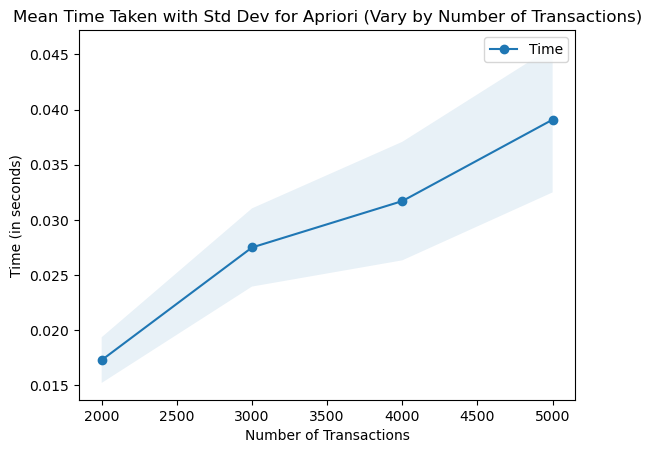

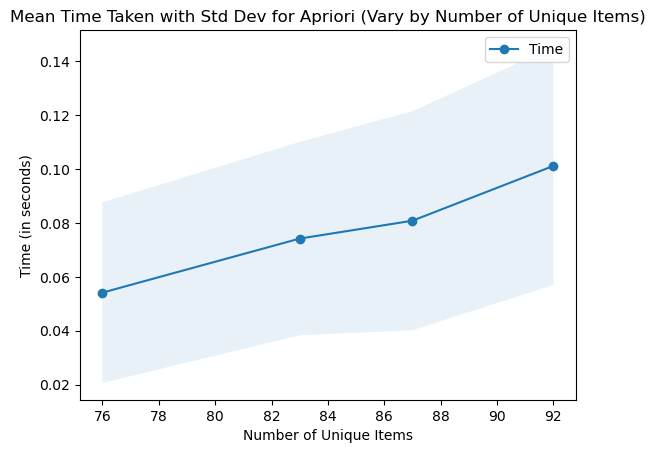

In [18]:
#Frequent itemset generation and high confidence rules generation over 100 runs for each variation to obtain mean and std dev of combined timings.

import time
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

num_runs = 100

timing_ap = []

#Loop through each variation
for i, variationdf in enumerate(variation_df):
    timing_ap_var = []

    for x in range(num_runs):        
        start_time = time.time()
        freq_items_ap = apriori(variationdf, min_support=0.01)
        rules_ap = association_rules(freq_items_ap, metric="confidence", min_threshold=0.7)
        end_time = time.time()
        timing_ap_var.append(end_time - start_time)
        
    timing_ap.append(timing_ap_var)

#Calculate mean and std dev
mean_timing_ap_trans = np.array([np.mean(timing_ap[i]) for i in range(4)])
std_dev_timing_ap_trans = np.array([np.std(timing_ap[i]) for i in range(4)])
mean_timing_ap_uniq = np.array([np.mean(timing_ap[i]) for i in [4,5,6,7]])
std_dev_timing_ap_uniq = np.array([np.std(timing_ap[i]) for i in [4,5,6,7]])

x_trans = [len(variation_df[0]), len(variation_df[1]), len(variation_df[2]), len(variation_df[3])]
x_uniq = [len(variation_df[4].columns), len(variation_df[5].columns), len(variation_df[6].columns), len(variation_df[7].columns)]
#Plot number of transactions against time
fig, ax2 = plt.subplots()
ax2.plot(x_trans, mean_timing_ap_trans, marker='o', label='Time', linestyle='-')
ax2.fill_between(x_trans, mean_timing_ap_trans - std_dev_timing_ap_trans, mean_timing_ap_trans + std_dev_timing_ap_trans, alpha=0.1)                                            
ax2.set_xlabel('Number of Transactions')
ax2.set_ylabel('Time (in seconds)')
ax2.set_title('Mean Time Taken with Std Dev for Apriori (Vary by Number of Transactions)')
ax2.legend()

fig, ax3 = plt.subplots()
ax3.plot(x_uniq, mean_timing_ap_uniq, marker='o', label='Time', linestyle='-')
ax3.fill_between(x_uniq, mean_timing_ap_uniq - std_dev_timing_ap_uniq, mean_timing_ap_uniq + std_dev_timing_ap_uniq, alpha=0.1)                                                       
ax3.set_xlabel('Number of Unique Items')
ax3.set_ylabel('Time (in seconds)')
ax3.set_title('Mean Time Taken with Std Dev for Apriori (Vary by Number of Unique Items)')
ax3.legend()

plt.show()

From the graphs, we can tell that Apriori time increases linearly as number of transactions increases and as number of unique items increases. Next, we will create small datasets for brute-force approach. 

Based on theory, time complexity for Brute-Force approach is denoted by O(NMw) where N is the number of transactions, M is the number of itemsets denoted by 2^d where d is the number of unique items (for number of non-empty itemsets it's 2^d-1, but we can drop the -1 since it is negligible for large d) , and w is the max transaction width. 

Since brute-force time (t) is proportional to N(2^d)(w),
- t=m(N) * 2^d * w, where m is a positive constant that can be derived from actual measurements of brute-force time on small datasets that vary in number of transactions while keeping number of unique items and max width the same.
- t= N * k(2^d) * w, where k is a positive constant that can be derived from actual measurements of brute-force time on small datasets that vary in number of unique items while keeping number of transactions and max width the same

To find the constants m and k, we will vary the brute-force datasets as follows:
- vary number of transactions N, keeping d (and hence M) and w constant.
- vary number of unique items d (and hence M), keeping N and w constant

We need not vary max width w as we are not estimating brute-force time for datasets that vary by width and moreover, the max width of our full dataset is relatively small at only 11.


In [19]:
#Create small datasets for brute force approach - vary number of transactions, keeping number of unique items and max width the same.
target_unique = 10

num_transactions = 5

current_unique = 0
num_iterations = 0
random_state = None  

while current_unique != target_unique:
    random_state = num_iterations
    variation_bfa_1 = transactions_list.sample(n=num_transactions, random_state=random_state)
    current_unique = len(set([item for sublist in variation_bfa_1['Items'] for item in sublist]))
    num_iterations += 1

print("There are", len(variation_bfa_1), "transactions in variation_bfa_1.")
print("There are", len(set([item for sublist in variation_bfa_1['Items'] for item in sublist])), "unique items in variation_bfa_1.")
print("The average width per transaction for variation_bfa_1 is", int(variation_bfa_1['Items'].apply(len).mean()),'.')
print("The max transaction width for variation_bfa_1 is", int(variation_bfa_1['Items'].apply(len).max()),'.')
print('\n')

num_transactions = 8

current_unique = 0
num_iterations = 0
random_state = None  

while current_unique != target_unique:
    random_state = num_iterations
    variation_bfa_2 = transactions_list.sample(n=num_transactions, random_state=random_state)
    current_unique = len(set([item for sublist in variation_bfa_2['Items'] for item in sublist]))
    num_iterations += 1

print("There are", len(variation_bfa_2), "transactions in variation_bfa_2.")
print("There are", len(set([item for sublist in variation_bfa_2['Items'] for item in sublist])), "unique items in variation_bfa_2.")
print("The average width per transaction for variation_bfa_2 is", int(variation_bfa_2['Items'].apply(len).mean()),'.')
print("The max transaction width for variation_bfa_2 is", int(variation_bfa_2['Items'].apply(len).max()),'.')
print('\n')

num_transactions = 9

current_unique = 0
num_iterations = 0
random_state = None  

while current_unique != target_unique:
    random_state = num_iterations
    variation_bfa_3 = transactions_list.sample(n=num_transactions, random_state=random_state)
    current_unique = len(set([item for sublist in variation_bfa_3['Items'] for item in sublist]))
    num_iterations += 1

print("There are", len(variation_bfa_3), "transactions in variation_bfa_3.")
print("There are", len(set([item for sublist in variation_bfa_3['Items'] for item in sublist])), "unique items in variation_bfa_3.")
print("The average width per transaction for variation_bfa_3 is", int(variation_bfa_3['Items'].apply(len).mean()),'.')
print("The max transaction width for variation_bfa_3 is", int(variation_bfa_3['Items'].apply(len).max()),'.')
print('\n')

num_transactions = 11

current_unique = 0
num_iterations = 0
random_state = None  

while current_unique != target_unique:
    random_state = num_iterations
    variation_bfa_4 = transactions_list.sample(n=num_transactions, random_state=random_state)
    current_unique = len(set([item for sublist in variation_bfa_4['Items'] for item in sublist]))
    num_iterations += 1

print("There are", len(variation_bfa_4), "transactions in variation_bfa_4.")
print("There are", len(set([item for sublist in variation_bfa_4['Items'] for item in sublist])), "unique items in variation_bfa_4.")
print("The average width per transaction for variation_bfa_4 is", int(variation_bfa_4['Items'].apply(len).mean()),'.')
print("The max transaction width for variation_bfa_4 is", int(variation_bfa_4['Items'].apply(len).max()),'.')
print('\n')

There are 5 transactions in variation_bfa_1.
There are 10 unique items in variation_bfa_1.
The average width per transaction for variation_bfa_1 is 2 .
The max transaction width for variation_bfa_1 is 2 .


There are 8 transactions in variation_bfa_2.
There are 10 unique items in variation_bfa_2.
The average width per transaction for variation_bfa_2 is 2 .
The max transaction width for variation_bfa_2 is 2 .


There are 9 transactions in variation_bfa_3.
There are 10 unique items in variation_bfa_3.
The average width per transaction for variation_bfa_3 is 2 .
The max transaction width for variation_bfa_3 is 2 .


There are 11 transactions in variation_bfa_4.
There are 10 unique items in variation_bfa_4.
The average width per transaction for variation_bfa_4 is 2 .
The max transaction width for variation_bfa_4 is 2 .




In [20]:
#Encode transactions in datasets for brute force approach.
variations_bfa =[variation_bfa_1, variation_bfa_2, variation_bfa_3, variation_bfa_4]
variation_bfa_df =[]

for variationbfa in variations_bfa:
    te= TransactionEncoder()
    variation_bfa_enc = te.fit(variationbfa['Items']).transform(variationbfa['Items'])
    variationbfa = pd.DataFrame(variation_bfa_enc, columns=te.columns_)
    variation_bfa_df.append(variationbfa)


In [21]:
#Develop brute force algorithm for frequent itemset generation and high confidence rules generation.

from itertools import combinations

#Create a function to calcuate support of an itemset.
def calculate_support(dataset, itemset):
    count = 0
    for x, row in dataset.iterrows():
        if all(row[item] for item in itemset):
            count += 1
    return count / len(dataset)

#Create a function to generate rules.
def generate_rules(freq_items, min_confidence):
    rules_bfa = []
    support_dict = {tuple(itemset): support for itemset, support in freq_items}

    for itemset, support in freq_items:
        for width in range(1, len(itemset)):
            for antecedent in combinations(itemset, width):
                antecedent = set(antecedent)
                consequent = set(itemset) - antecedent

                antecedent_key = tuple(antecedent)
                antecedent_support = support_dict.get(antecedent_key, 0)

                if antecedent_support > 0:
                    confidence = support / antecedent_support
                    if confidence >= min_confidence:
                        rules_bfa.append((antecedent, consequent, confidence))

    return rules_bfa

In [22]:
#Prove brute-force algorithm correctness by contradiction.
import math

itemset_count=0
min_support = 0.01
min_confidence = 0.7
   
#Frequent itemset generation
unique_items = variation_bfa_df[0].columns
freq_items_bfa = []
for width in range(1, len(unique_items) + 1):
    itemsets = combinations(unique_items, width)
    for itemset in itemsets:
        itemset_count += 1
        support = calculate_support(variation_bfa_df[0], itemset)
        if support >= min_support:
            freq_items_bfa.append((itemset, support))
                        
#High confidence rules generation
rules_bfa=generate_rules(freq_items_bfa, min_confidence)

print ("Total number of candidate itemsets generated from the brute-force algorithm:", int(itemset_count))

#Checking the correctness of the brute-force algorithm for frequent itemset generation

print("Assume that there is an itemset of width i that has not been generated/has been generated more than once.")

total_combinations = 0

for i in range(1, len(unique_items) + 1):
    total_combinations += math.comb(len(unique_items), i)

if itemset_count == total_combinations:
      
    print("Total candidate itemsets generated matches total possible combinations","wCi where 1=<i=<w", "therefore assumption that there is an itemset that has not been generated is is invalid and algorithm is correct.")

else:
    
    print("Total candidate itemsets generated does not match total possible combinations","wCi where 1=<i=<w", "therefore assumption that there is an itemset that has not been generated cannot be invalidated and algorithm is incorrect.")
    
if int(itemset_count) == 2**(len(unique_items))-1:

    print("Total candidate itemsets generated matches max number of possible candidate itemsets","2^d-1", "therefore assumption that there is an itemset that has been generated more than once is invalid and algorithm is correct.")

else:
    
    print("Total possible itemsets does not match", "2^d-1", "therefore assumpation that there is an itemset that has been generated more than once cannot be invalidated and algorithm is incorrect.")

Total number of candidate itemsets generated from the brute-force algorithm: 1023
Assume that there is an itemset of width i that has not been generated/has been generated more than once.
Total candidate itemsets generated matches total possible combinations wCi where 1=<i=<w therefore assumption that there is an itemset that has not been generated is is invalid and algorithm is correct.
Total candidate itemsets generated matches max number of possible candidate itemsets 2^d-1 therefore assumption that there is an itemset that has been generated more than once is invalid and algorithm is correct.


[0.17221591 0.29361203 0.3295238  0.374212  ]


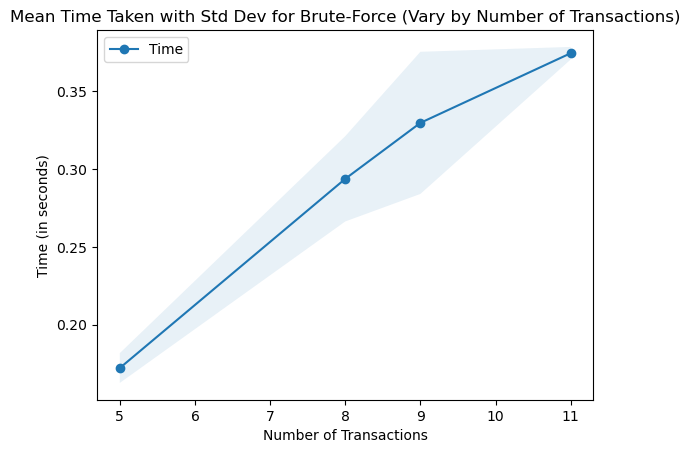

In [23]:
num_runs = 10
timing_bfa_sample = []
min_support = 0.01
min_confidence = 0.7

#Loop through each variation
for i, variationbfa in enumerate(variation_bfa_df):
    timing_bfa_sample_var = []

    for x in range(num_runs):        
        start_time = time.time()
    
        #Frequent itemset generation
        unique_items = variationbfa.columns
        freq_items_bfa = []
        for width in range(1, len(unique_items) + 1):
            itemsets = combinations(unique_items, width)
            for itemset in itemsets:
                support = calculate_support(variationbfa, itemset)
                if support >= min_support:
                    freq_items_bfa.append((itemset, support))
                        
        #High confidence rules generation
        rules_bfa=generate_rules(freq_items_bfa, min_confidence)
        end_time = time.time()
        timing_bfa_sample_var.append(end_time - start_time)
    
    timing_bfa_sample.append(timing_bfa_sample_var)
    
# Calculate mean and std dev
mean_timing_bfa_sample = np.mean(timing_bfa_sample, axis=1)
std_dev_timing_bfa_sample = np.std(timing_bfa_sample, axis=1)

print(mean_timing_bfa_sample)

#Plot number of transactions against time
from matplotlib.ticker import MultipleLocator
x = [len(variation_bfa_df[0]), len(variation_bfa_df[1]), len(variation_bfa_df[2]), len(variation_bfa_df[3])]
fig, ax2 = plt.subplots()
ax2.plot(x, mean_timing_bfa_sample, marker='o', label='Time', linestyle='-')
ax2.fill_between(x, mean_timing_bfa_sample - std_dev_timing_bfa_sample, mean_timing_bfa_sample + std_dev_timing_bfa_sample, alpha=0.1)
ax2.set_xlabel('Number of Transactions')
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.set_ylabel('Time (in seconds)')
ax2.set_title('Mean Time Taken with Std Dev for Brute-Force (Vary by Number of Transactions)')
ax2.legend()

plt.show()

Similar to Apriori, time taken for brute-force approach increases linearly as number of transactions increases.

In [35]:
#Find constant factor m based on time taken for brute-force approach on small dataset.
m1 = mean_timing_bfa_sample[0]/len(variation_bfa_df[0])/2/10
m2 = mean_timing_bfa_sample[1]/len(variation_bfa_df[1])/2/10
m3 = mean_timing_bfa_sample[2]/len(variation_bfa_df[2])/2/10
m4 = mean_timing_bfa_sample[3]/len(variation_bfa_df[3])/2/10
m= [m1, m2, m3, m4]
mean_m=np.mean(m)
print(m)
print("Mean value for constant m_trans:", mean_m)

[0.0017221591472625732, 0.0018350751698017122, 0.0018306877877977158, 0.0017009636488827793]
Mean value for constant m_trans: 0.0017722214384361954


In [31]:
#Vary by number of unique items for small datasets for brute force approach, keeping number of transactions and max width the same.

num_transactions = 8

variation_bfa_1a = transactions_list.sample(n=num_transactions, random_state=81)

print("There are", len(variation_bfa_1a), "transactions in variation_bfa_1a.")
print("There are", len(set([item for sublist in variation_bfa_1a['Items'] for item in sublist])), "unique items in variation_bfa_1a.")
print("The average width per transaction for variation_bfa_1a is", int(variation_bfa_1a['Items'].apply(len).mean()),'.')
print("The max transaction width for variation_bfa_1a is", int(variation_bfa_1a['Items'].apply(len).max()),'.')
print('\n')

variation_bfa_2a = transactions_list.sample(n=num_transactions, random_state=307)

print("There are", len(variation_bfa_2a), "transactions in variation_bfa_2a.")
print("There are", len(set([item for sublist in variation_bfa_2a['Items'] for item in sublist])), "unique items in variation_bfa_2a.")
print("The average width per transaction for variation_bfa_2a is", int(variation_bfa_2a['Items'].apply(len).mean()),'.')
print("The max transaction width for variation_bfa_2a is", int(variation_bfa_2a['Items'].apply(len).max()),'.')
print('\n')

variation_bfa_3a = transactions_list.sample(n=num_transactions, random_state=21)

print("There are", len(variation_bfa_3a), "transactions in variation_bfa_3a.")
print("There are", len(set([item for sublist in variation_bfa_3a['Items'] for item in sublist])), "unique items in variation_bfa_3a.")
print("The average width per transaction for variation_bfa_3a is", int(variation_bfa_3a['Items'].apply(len).mean()),'.')
print("The max transaction width for variation_bfa_3a is", int(variation_bfa_3a['Items'].apply(len).max()),'.')
print('\n')

variation_bfa_4a = transactions_list.sample(n=num_transactions, random_state=402)

print("There are", len(variation_bfa_4a), "transactions in variation_bfa_4a.")
print("There are", len(set([item for sublist in variation_bfa_4a['Items'] for item in sublist])), "unique items in variation_bfa_4a.")
print("The average width per transaction for variation_bfa_4a is", int(variation_bfa_4a['Items'].apply(len).mean()),'.')
print("The max transaction width for variation_bfa_4a is", int(variation_bfa_4a['Items'].apply(len).max()),'.')
print('\n')

There are 8 transactions in variation_bfa_1a.
There are 12 unique items in variation_bfa_1a.
The average width per transaction for variation_bfa_1a is 2 .
The max transaction width for variation_bfa_1a is 2 .


There are 8 transactions in variation_bfa_2a.
There are 13 unique items in variation_bfa_2a.
The average width per transaction for variation_bfa_2a is 2 .
The max transaction width for variation_bfa_2a is 2 .


There are 8 transactions in variation_bfa_3a.
There are 14 unique items in variation_bfa_3a.
The average width per transaction for variation_bfa_3a is 2 .
The max transaction width for variation_bfa_3a is 2 .


There are 8 transactions in variation_bfa_4a.
There are 15 unique items in variation_bfa_4a.
The average width per transaction for variation_bfa_4a is 2 .
The max transaction width for variation_bfa_4a is 2 .




[1.0812536  2.28861558 4.65775054 9.35069194]


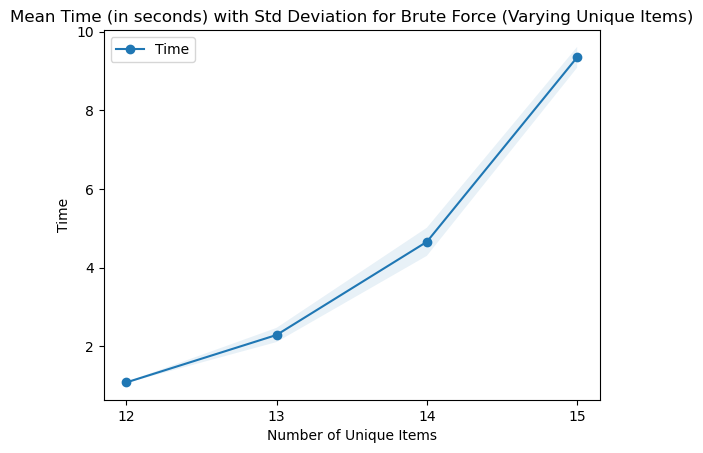

In [32]:
variations_bfa_uniq =[variation_bfa_1a, variation_bfa_2a, variation_bfa_3a, variation_bfa_4a]
variation_bfa_uniq_df =[]

for variationbfauniq in variations_bfa_uniq:
    te= TransactionEncoder()
    variation_bfa_uniq_enc = te.fit(variationbfauniq['Items']).transform(variationbfauniq['Items'])
    variationbfauniq = pd.DataFrame(variation_bfa_uniq_enc, columns=te.columns_)
    variation_bfa_uniq_df.append(variationbfauniq)


num_runs = 10
timing_bfa_uniq = []
min_support = 0.01
min_confidence = 0.7

#Loop through each variation
for i, variationbfauniq in enumerate(variation_bfa_uniq_df):
    timing_bfa_uniq_var = []

    for x in range(num_runs):        
        start_time = time.time()
    
        #Frequent itemset generation
        unique_items = variationbfauniq.columns
        freq_items_bfa_uniq = []
        for width in range(1, len(unique_items) + 1):
            itemsets = combinations(unique_items, width)
            for itemset in itemsets:
                support = calculate_support(variationbfauniq, itemset)
                if support >= min_support:
                    freq_items_bfa_uniq.append((itemset, support))
                        
        #High confidence rules generation
        rules_bfa_uniq=generate_rules(freq_items_bfa_uniq, min_confidence)
        end_time = time.time()
        timing_bfa_uniq_var.append(end_time - start_time)
    
    timing_bfa_uniq.append(timing_bfa_uniq_var)
    
# Calculate mean and std dev
mean_timing_bfa_uniq = np.mean(timing_bfa_uniq, axis=1)
std_dev_timing_bfa_uniq= np.std(timing_bfa_uniq, axis=1)

print(mean_timing_bfa_uniq)
#Plot number of transactions against time
x = [len(variation_bfa_uniq_df[0].columns), len(variation_bfa_uniq_df[1].columns), len(variation_bfa_uniq_df[2].columns), len(variation_bfa_uniq_df[3].columns)]
fig, ax2 = plt.subplots()
ax2.plot(x, mean_timing_bfa_uniq, marker='o', label='Time', linestyle='-')
ax2.fill_between(x, mean_timing_bfa_uniq - std_dev_timing_bfa_uniq, mean_timing_bfa_uniq + std_dev_timing_bfa_uniq, alpha=0.1)
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.set_xlabel('Number of Unique Items')
ax2.set_ylabel('Time')
ax2.set_title('Mean Time (in seconds) with Std Deviation for Brute Force (Varying Unique Items)')
ax2.legend()

plt.show()

Graph shows exponential growth, as is expected of 2^d.

In [36]:
#Find constant k

k1 = mean_timing_bfa_uniq[0] / 2**len(variation_bfa_uniq_df[0].columns)/2/8
k2 = mean_timing_bfa_uniq[1] / 2**len(variation_bfa_uniq_df[1].columns)/2/8
k3 = mean_timing_bfa_uniq[2] / 2**len(variation_bfa_uniq_df[2].columns)/2/8
k4 = mean_timing_bfa_uniq[3] / 2**len(variation_bfa_uniq_df[3].columns)/2/8
k = [k1, k2, k3, k4]
mean_k=np.mean(k)
print(k)
print ("Mean constant k:", mean_k)

[1.649862060730811e-05, 1.7460751223552506e-05, 1.7767908229870954e-05, 1.783502948455862e-05]
Mean constant k: 1.739057738632255e-05


Mean Apriori timings: [0.01700489 0.02610581 0.02910468 0.03659129]
Mean Brute-Force timings: [1.86487526e+50 3.10812544e+50 3.72975053e+50 5.18020907e+50]


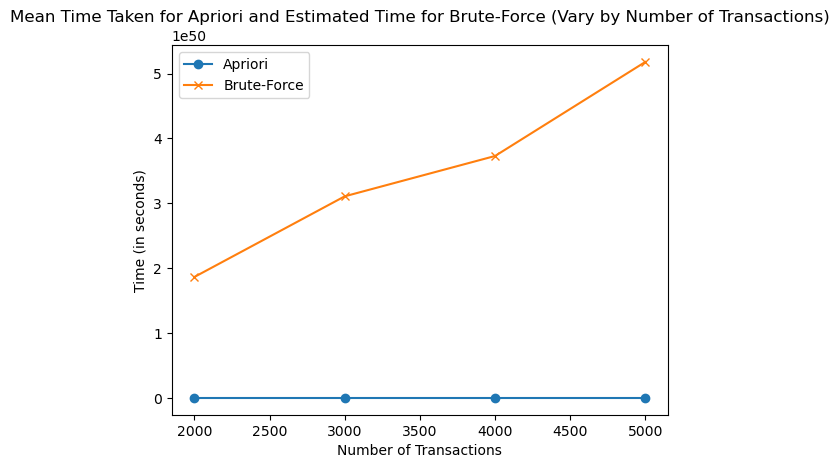

In [64]:
#Plot Apriori actual timing and brute-force estimated timing for datasets that vary by number of transactions

num_runs = 100

timing_ap = []
timing_bfa_trans = []

#Loop through each variation.
for i, variationdf in enumerate(variation_df):
    timing_ap_var = []
    timing_bfa_trans_var = []

    for x in range(num_runs):
        #Timing for Apriori
        start_time = time.time()
        freq_items_ap = apriori(variationdf, min_support=0.01)
        rules_ap = association_rules(freq_items_ap, metric="confidence", min_threshold=0.7)
        end_time = time.time()
        timing_ap_var.append(end_time - start_time)

        #Timing for Brute Force Approach
        bfa_time_trans = mean_m * len(variationdf) * 2**int(len(variationdf.columns)) * variationdf.sum(axis=1).max()
        timing_bfa_trans_var.append(bfa_time_trans)
                
    timing_ap.append(timing_ap_var)
    timing_bfa_trans.append(timing_bfa_trans_var)
    
#Calculate mean time
mean_timing_ap_trans = np.array([np.mean(timing_ap[i]) for i in range(4)])
mean_timing_bfa_trans=np.array([np.mean(timing_bfa_trans[i]) for i in range(4)])

#Plot number of transactions against time for both Apriori and brute force approach
x_trans = [len(variation_df[0]), len(variation_df[1]), len(variation_df[2]), len(variation_df[3])]
fig, ax2 = plt.subplots()
ax2.plot(x_trans, mean_timing_ap_trans, marker='o', label='Apriori', linestyle='-')
ax2.plot(x_trans, mean_timing_bfa_trans, marker='x', label='Brute-Force', linestyle='-')                                        
ax2.set_xlabel('Number of Transactions')
ax2.set_ylabel('Time (in seconds)')
ax2.set_title('Mean Time Taken for Apriori and Estimated Time for Brute-Force (Vary by Number of Transactions)')
ax2.legend()

print("Mean Apriori timings:", mean_timing_ap_trans)
print("Mean Brute-Force timings:",mean_timing_bfa_trans)

Mean Apriori timings: [0.05557971 0.07712766 0.0804908  0.10190775]
Mean Brute-Force timings: [1.05119590e+21 1.17733941e+23 2.15284921e+24 6.88911746e+25]


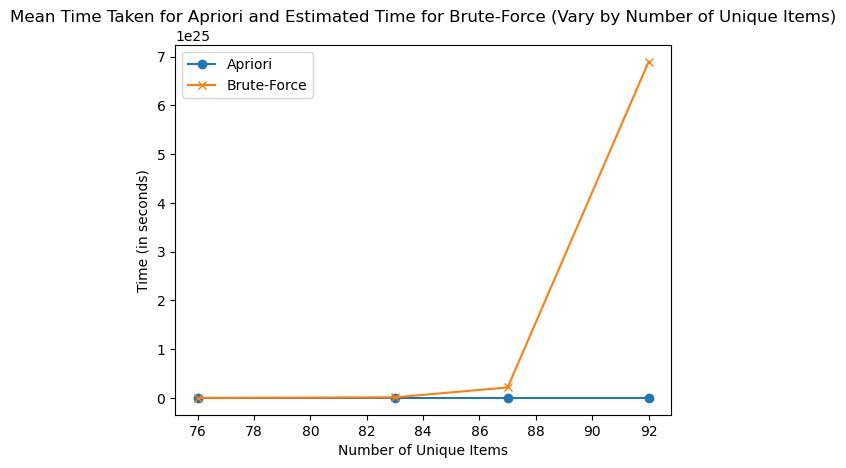

In [70]:
#Plot Apriori actual timing and brute-force estimated timing for datasets that vary by number of unique items.

num_runs = 100

timing_ap = []
timing_bfa_uniq = []

#Loop through each variation.
for i, variationdf in enumerate(variation_df):
    timing_ap_var = []
    timing_bfa_uniq_var = []

    for x in range(num_runs):
        #Timing for Apriori
        start_time = time.time()
        freq_items_ap = apriori(variationdf, min_support=0.01)
        rules_ap = association_rules(freq_items_ap, metric="confidence", min_threshold=0.7)
        end_time = time.time()
        timing_ap_var.append(end_time - start_time)

        #Timing for Brute Force Approach
        bfa_time_uniq = len(variationdf) * mean_k * 2**int(len(variationdf.columns)) * variationdf.sum(axis=1).max()
        timing_bfa_uniq_var.append(bfa_time_uniq)
        
    timing_ap.append(timing_ap_var)
    timing_bfa_uniq.append(timing_bfa_uniq_var)
    
#Calculate mean and std dev for Apriori. No std dev for brute force approach since it's based on formula.
mean_timing_ap_uniq = np.array([np.mean(timing_ap[i]) for i in [4,5,6,7]])
mean_timing_bfa_uniq=np.array([np.mean(timing_bfa_uniq[i]) for i in [4,5,6,7]])

#Plot number of transactions against time for both Apriori and brute force approach
x_uniq =[len(variation_df[4].columns), len(variation_df[5].columns), len(variation_df[6].columns), len(variation_df[7].columns)]
fig, ax3 = plt.subplots()
ax3.plot(x_uniq, mean_timing_ap_uniq, marker='o', label='Apriori', linestyle='-')
ax3.plot(x_uniq, mean_timing_bfa_uniq, marker='x', label='Brute-Force', linestyle='-')
ax3.set_xlabel('Number of Unique Items')
ax3.set_ylabel('Time (in seconds)')
ax3.set_title('Mean Time Taken for Apriori and Estimated Time for Brute-Force (Vary by Number of Unique Items)')
ax3.legend()

print("Mean Apriori timings:", mean_timing_ap_uniq)
print("Mean Brute-Force timings:",mean_timing_bfa_uniq)

As number of transactions increases, both Apriori and brute-force time increase somewhat linearly. However, as number of unique items increases, Apriori time increases somewhat linearly but brute-force time increases exponentially. In conclusion, association rule mining algorithms such as Apriori are computationally much more efficient than brute-force approach, especially for large number of unique items.